In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from keras.callbacks import EarlyStopping
from numpy.random import seed
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(X_train_init,y_train_init), (X_test_init,y_test_init) = mnist.load_data()

# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train_init.shape, y_train_init.shape))
print('Test: X=%s, y=%s' % (X_test_init.shape, y_test_init.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


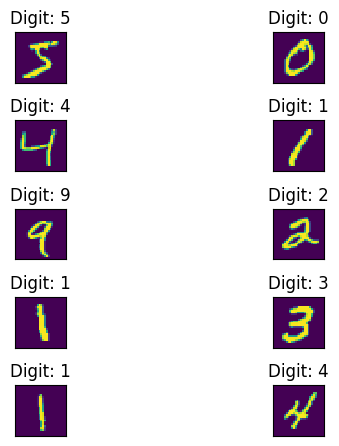

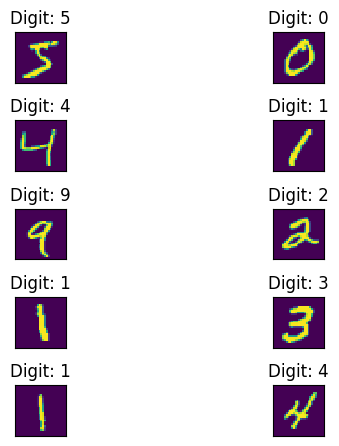

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure()
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.tight_layout()
  plt.imshow(X_train_init[i], interpolation='none')
  plt.title("Digit: {}".format(y_train_init[i]))
  plt.xticks([])
  plt.yticks([])
fig

Pre-processing the images

In [ ]:
X = X_train_init.reshape((60000, 784))
X_test = X_test_init.reshape((10000, 784))

X = X.astype('float32')
X_test = X_test.astype('float32')
X= X/255
X_test= X_test/255
print('X shape:', X.shape)

X shape: (60000, 784)


One-hot encoding on target values

In [5]:
y = keras.utils.to_categorical(y_train_init, 10)
y_test = keras.utils.to_categorical(y_test_init, 10)


Modeling


Fully Connected Layers Model Building

In [ ]:
fully_connected_model = Sequential()
fully_connected_model.add(Dense(256, input_dim=28*28, activation='relu'))
fully_connected_model.add(Dense(256, activation='relu'))
fully_connected_model.add(Dense(32, activation='relu'))
fully_connected_model.add(Dense(10, activation='softmax'))

fully_connected_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


fully_connected_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 32)                8224      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 275306 (1.05 MB)
Trainable params: 275306 (1.05 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Model Fitting

In [ ]:
import os
from tensorflow import keras

# Ensure the directory exists before saving the model
save_dir = "checkpoints" 
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

savebest = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(save_dir, "best.weights"), 
    monitor="val_loss",
    verbose=1,
    save_best_only=True
)


fully_connected_model_fit = fully_connected_model.fit(
    X, y, 
    batch_size=32, 
    epochs=10, 
    verbose=1, 
    validation_split=0.3,
    callbacks=[earlystopping, savebest]
)


Epoch 1/10
1307/1313 [============================>.] - ETA: 0s - loss: 0.0443 - accuracy: 0.9860
Epoch 1: val_loss improved from inf to 0.11262, saving model to checkpoints\best.weights
INFO:tensorflow:Assets written to: checkpoints\best.weights\assets


INFO:tensorflow:Assets written to: checkpoints\best.weights\assets


1313/1313 [==============================] - 9s 6ms/step - loss: 0.0445 - accuracy: 0.9860 - val_loss: 0.1126 - val_accuracy: 0.9687
Epoch 2/10
1308/1313 [============================>.] - ETA: 0s - loss: 0.0350 - accuracy: 0.9884
Epoch 2: val_loss did not improve from 0.11262
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.1132 - val_accuracy: 0.9716
Epoch 3/10
1302/1313 [============================>.] - ETA: 0s - loss: 0.0300 - accuracy: 0.9901
Epoch 3: val_loss did not improve from 0.11262
1313/1313 [==============================] - 8s 6ms/step - loss: 0.0300 - accuracy: 0.9900 - val_loss: 0.1371 - val_accuracy: 0.9698
Epoch 4/10
1309/1313 [============================>.] - ETA: 0s - loss: 0.0255 - accuracy: 0.9925
Epoch 4: val_loss did not improve from 0.11262
1313/1313 [==============================] - 7s 6ms/step - loss: 0.0256 - accuracy: 0.9925 - val_loss: 0.1169 - val_accuracy: 0.9721
Epoch 5/10
1307/1313 [===========


Prediction and Model Evaluation

In [10]:
_, acc = fully_connected_model.evaluate(X, y, verbose=0)
print('Accuracy of Training dataset with Fully Connected Layers is %.3f' % (acc * 100.0))
_, acc_test = fully_connected_model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Testing dataset with Fully Connected Layers is %.3f' % (acc_test * 100.0))

Accuracy of Training dataset with Fully Connected Layers is 98.438
Accuracy of Testing dataset with Fully Connected Layers is 97.090


Accuracy and Loss Plots of Train & Test Dataset

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


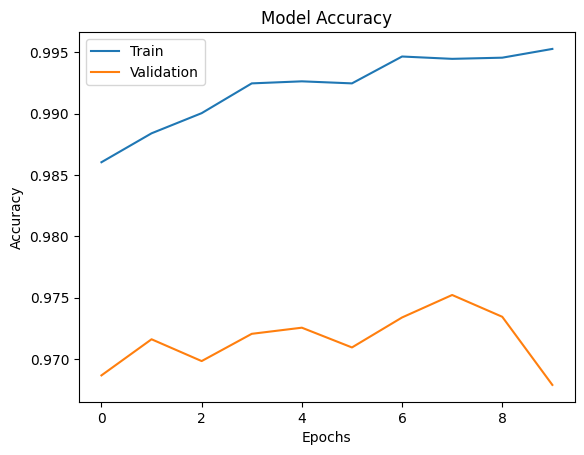

In [ ]:
import matplotlib.pyplot as plt

print(fully_connected_model_fit.history.keys())
plt.plot(fully_connected_model_fit.history.get('accuracy', fully_connected_model_fit.history.get('acc')))
plt.plot(fully_connected_model_fit.history.get('val_accuracy', fully_connected_model_fit.history.get('val_acc')))
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

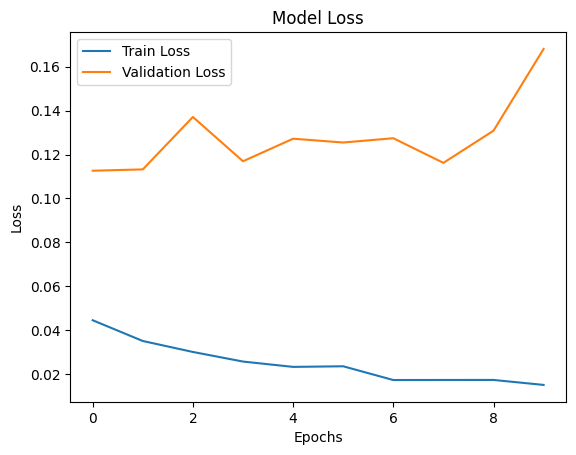

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fully_connected_model_fit.history['loss'], label='Train Loss')
plt.plot(fully_connected_model_fit.history['val_loss'], label='Validation Loss')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



Confusion Matrix and Classification Report

In [13]:

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#multi-classification confusion matrix
y_pred_fc = np.argmax(fully_connected_model.predict(X_test) , axis=1)
cm_fc= confusion_matrix(y_true = np.argmax(y_test, axis=1), y_pred = y_pred_fc)
print(cm_fc)
# classification report of FC
print(classification_report(np.argmax(y_test, axis=1), y_pred_fc))

313/313 [==============================] - 1s 3ms/step
[[ 951    1    3    1    1    3    7    5    1    7]
 [   0 1128    1    2    0    0    3    0    1    0]
 [   2    1  994   14    3    1    3    9    5    0]
 [   0    0    2  996    0    2    0    6    2    2]
 [   1    3    1    1  957    0    4    2    0   13]
 [   0    0    0   20    1  865    2    1    0    3]
 [   1    3    0    2    3    3  945    0    1    0]
 [   0    5    7    2    2    1    0 1005    0    6]
 [   4    2    6   29    2   15   16    6  886    8]
 [   0    3    1    7    3    8    1    4    0  982]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.93      0.99      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.96      0.97      0.97       892
           6       0.96      0.99  


CNN Model Building

In [ ]:
X = X_train_init.reshape((60000, 28,28,1))
X_test = X_test_init.reshape((10000, 28,28,1))

X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One hot encoding for target value
y = keras.utils.to_categorical(y_train_init,10)
y_test = keras.utils.to_categorical(y_test_init,10)

In [15]:
y_test.shape
y.shape
X.shape
X_test.shape

(10000, 28, 28, 1)

In [ ]:
model = Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))


model.summary()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 13, 13, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                      

Model Fitting

In [ ]:
import os
from tensorflow import keras

checkpoint_path = "best_model.h5"  
earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1)

savebest = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,  
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=True  
)
model_fit = model.fit(
    X, y, 
    epochs=10, 
    batch_size=32, 
    verbose=1, 
    validation_data=(X_test, y_test), 
    callbacks=[earlystopping, savebest]
)


Epoch 1/10
1875/1875 [==============================] - ETA: 0s - loss: 0.0637 - accuracy: 0.9816
Epoch 1: val_loss improved from inf to 0.06033, saving model to best_model.h5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0637 - accuracy: 0.9816 - val_loss: 0.0603 - val_accuracy: 0.9827
Epoch 2/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.0505 - accuracy: 0.9853
Epoch 2: val_loss improved from 0.06033 to 0.04056, saving model to best_model.h5
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0504 - accuracy: 0.9853 - val_loss: 0.0406 - val_accuracy: 0.9872
Epoch 3/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0414 - accuracy: 0.9873
Epoch 3: val_loss improved from 0.04056 to 0.03688, saving model to best_model.h5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0414 - accuracy: 0.9873 - val_loss: 0.0369 - val_accuracy: 0.9876
Epoch 4/10
1875/1875 [==============================] - ETA


Prediction and Model Evaluation

In [21]:
_, acc_test = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy of Testing dataset with CNN is %.3f' % (acc_test * 100.0))
_, acc = model.evaluate(X, y, verbose=0)
print('Accuracy of Training dataset with CNN is %.3f' % (acc * 100.0))

Accuracy of Testing dataset with CNN is 99.250
Accuracy of Training dataset with CNN is 99.870


Accuracy and Loss Plots of Train & Test Dataset

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


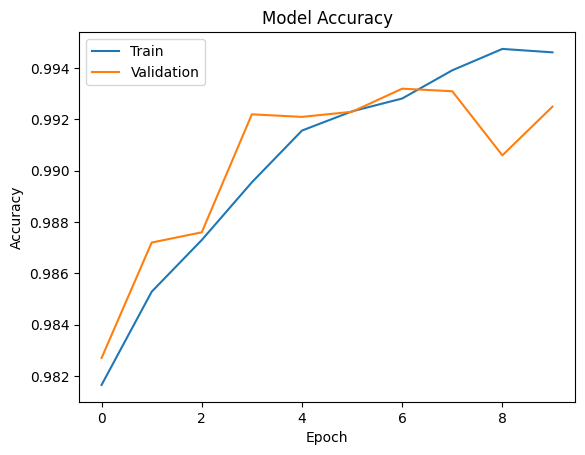

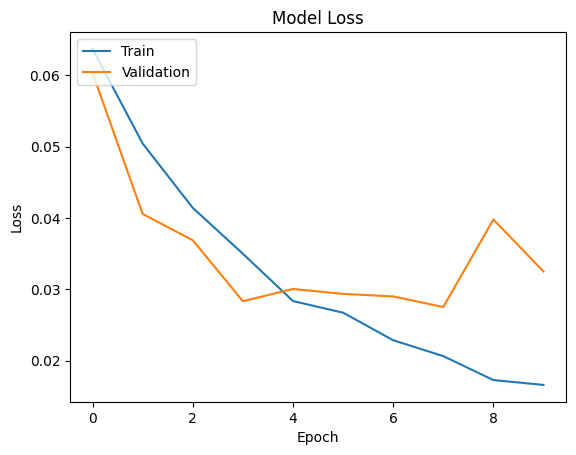

In [ ]:
import matplotlib.pyplot as plt
print(model_fit.history.keys())

plt.plot(model_fit.history.get('accuracy', model_fit.history.get('acc')))
plt.plot(model_fit.history.get('val_accuracy', model_fit.history.get('val_acc')))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(model_fit.history.get('loss'))
plt.plot(model_fit.history.get('val_loss'))
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


Confusion Matrix and Classification Report

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
y_pred_cnn = np.argmax(model.predict(X_test) , axis=1)
cm_cnn= confusion_matrix(y_true = np.argmax(y_test, axis=1), y_pred = y_pred_cnn)
print(cm_cnn)
print(classification_report(np.argmax(y_test, axis=1), y_pred_cnn))

313/313 [==============================] - 2s 7ms/step
[[ 976    0    1    0    0    0    2    1    0    0]
 [   0 1132    1    0    1    0    1    0    0    0]
 [   1    1 1027    1    0    0    0    2    0    0]
 [   0    0    2 1007    0    1    0    0    0    0]
 [   0    0    0    0  972    0    2    0    0    8]
 [   1    0    0    5    0  884    1    0    1    0]
 [   1    1    1    0    0    3  951    0    1    0]
 [   0    3    6    0    0    0    0 1016    0    3]
 [   2    0    1    3    1    1    0    0  964    2]
 [   0    1    0    2    3    4    0    1    2  996]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99  

EfficientNetB3 (Pre-trained) Model Building

In [24]:
!python --version

Python 3.8.10


In [25]:
!pip install -U efficientnet


from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten 
from keras.models import Model
from keras import optimizers

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

In [ ]:
(X, y), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X = np.expand_dims(X, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)
X = np.repeat(X, 3, axis=-1)
X_test = np.repeat(X_test, 3, axis=-1)
X = X.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X = tf.image.resize(X, [32,32]) 
X_test = tf.image.resize(X_test, [32,32])
y = tf.keras.utils.to_categorical(y , num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test , num_classes=10)

print(X.shape, y.shape, X_test.shape,y_test.shape)

(60000, 32, 32, 3) (60000, 10) (10000, 32, 32, 3) (10000, 10)


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

with tf.compat.v1.Session() as sess:
    image = sess.run(X[1])

plt.imshow(image, cmap='gray')
plt.show()


RuntimeError: Attempting to capture an EagerTensor without building a function.

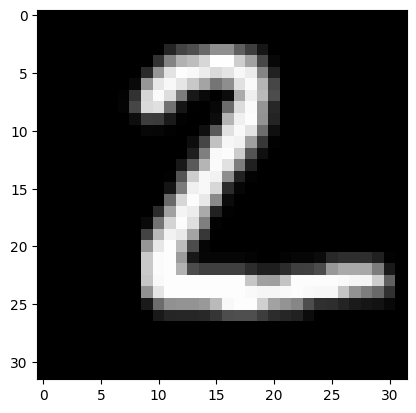

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
with tf.compat.v1.Session() as sess:
    image = sess.run(X_test[1])  

plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
from keras.applications.efficientnet import EfficientNetB3
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense, Flatten, Dropout

width_shape = 32
height_shape = 32
image_input = Input(shape=(width_shape, height_shape, 3))



final_model = Sequential()

effnet = EfficientNetB3(weights='imagenet', include_top=False,pooling='avg',
	                                                                  input_tensor=image_input)
final_model.add(effnet)
final_model.layers[0].trainable = False 
final_model.add(Flatten())
final_model.add(Dense(512, activation="relu"))
final_model.add(Dropout(0.25))
final_model.add(Dense(10, activation='softmax'))
final_model.summary()


final_model.compile(
          optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 1536)              0         
                                                                 
 dense_6 (Dense)             (None, 512)               786944    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 11575609 (44.16 MB)
Trainable params: 792074 (3.02 MB)
Non-trainable params: 10783535 (41.14 MB)
_________


Model Fitting

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

batch_size = 64

train_dataset = tf.data.Dataset.from_tensor_slices((X, y)).batch(batch_size)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(batch_size)

earlystopping = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)
savebest = keras.callbacks.ModelCheckpoint('best.weights', monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=True)

final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.utils import to_categorical

num_classes = 10  
y = to_categorical(y, num_classes)
y_test = to_categorical(y_test, num_classes)




In [30]:
_, acc = final_model.evaluate(train_dataset, verbose=0)
print('Accuracy of Training dataset with EfficientNetB3 is %.3f' % (acc * 100.0))

_, acc_test = final_model.evaluate(test_dataset, verbose=0)
print('Accuracy of Test dataset with EfficientNetB3 is %.3f' % (acc_test * 100.0))


Accuracy of Training dataset with EfficientNetB3 is 9.752
Accuracy of Test dataset with EfficientNetB3 is 9.740


In [ ]:
final_model_fit = final_model.fit(train_dataset, epochs=5, validation_data=test_dataset)
print(final_model_fit)  


Epoch 1/5
938/938 [==============================] - 153s 154ms/step - loss: 0.3227 - accuracy: 0.1533 - val_loss: 0.3041 - val_accuracy: 0.2497
Epoch 2/5
938/938 [==============================] - 141s 150ms/step - loss: 0.3097 - accuracy: 0.1995 - val_loss: 0.2957 - val_accuracy: 0.2826
Epoch 3/5
938/938 [==============================] - 135s 144ms/step - loss: 0.3053 - accuracy: 0.2171 - val_loss: 0.2896 - val_accuracy: 0.2729
Epoch 4/5
938/938 [==============================] - 137s 146ms/step - loss: 0.3023 - accuracy: 0.2301 - val_loss: 0.2865 - val_accuracy: 0.3146
Epoch 5/5
938/938 [==============================] - 136s 145ms/step - loss: 0.2997 - accuracy: 0.2423 - val_loss: 0.2831 - val_accuracy: 0.3211


Visualize the activation of the learned feature map on a selected layer

In [33]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

for i in range(len(effnet.layers)):
    layer = effnet.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

4 stem_conv_pad (None, 33, 33, 3)
5 stem_conv (None, 16, 16, 40)
8 block1a_dwconv (None, 16, 16, 40)
16 block1a_project_conv (None, 16, 16, 24)
18 block1b_dwconv (None, 16, 16, 24)
26 block1b_project_conv (None, 16, 16, 24)
30 block2a_expand_conv (None, 16, 16, 144)
33 block2a_dwconv_pad (None, 17, 17, 144)
34 block2a_dwconv (None, 8, 8, 144)
42 block2a_project_conv (None, 8, 8, 32)
44 block2b_expand_conv (None, 8, 8, 192)
47 block2b_dwconv (None, 8, 8, 192)
55 block2b_project_conv (None, 8, 8, 32)
59 block2c_expand_conv (None, 8, 8, 192)
62 block2c_dwconv (None, 8, 8, 192)
70 block2c_project_conv (None, 8, 8, 32)
74 block3a_expand_conv (None, 8, 8, 192)
77 block3a_dwconv_pad (None, 11, 11, 192)
78 block3a_dwconv (None, 4, 4, 192)
86 block3a_project_conv (None, 4, 4, 48)
88 block3b_expand_conv (None, 4, 4, 288)
91 block3b_dwconv (None, 4, 4, 288)
99 block3b_project_conv (None, 4, 4, 48)
103 block3c_expand_conv (None, 4, 4, 288)
106 block3c_dwconv (None, 4, 4, 288)
114 block3c_project_c

In [34]:
feature_map_model = Model(inputs=effnet.inputs , outputs=effnet.layers[5].output)

Original Image shape: (32, 32, 3)


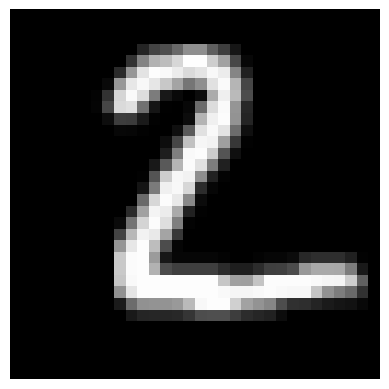

Expanded Image shape for Model: (1, 32, 32, 3)


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
if isinstance(X_test, tf.Tensor):
    X_test = X_test.numpy() 

# Select an image from X_test
img = X_test[1]  # Select the second image 
print("Original Image shape:", img.shape)

# Normalize to 0-255 if necessary (if values are in [0, 1])
if img.max() <= 1.0:
    img = (img * 255).astype("uint8")  # Scale to [0, 255]

# If grayscale (shape: height, width, 1), remove extra dimension
if img.ndim == 3 and img.shape[-1] == 1:
    img = img.squeeze(-1)  # Convert to (height, width)

# Display the image
plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
plt.axis('off')  # Hide axes
plt.show()

# Expand dimensions for model prediction
img_input = tf.expand_dims(img, axis=0)
print("Expanded Image shape for Model:", img_input.shape)


In [40]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Ensure feature extractor is defined
if 'feature_extractor' not in globals():
    raise ValueError("Error: 'feature_extractor' model is not defined!")

# Select an image from X_test
image = X_test[0]  # Select first test image
if isinstance(image, tf.Tensor):
    image = image.numpy()  # Convert to NumPy if it's a Tensor

# Resize image to 28x28 (as per model's expected input size)
image_resized = tf.image.resize(image, (28, 28))

# Convert to grayscale if necessary
if image_resized.shape[-1] == 3:  # If the image has 3 channels (RGB)
    image_resized = tf.image.rgb_to_grayscale(image_resized)

# Ensure correct shape (None, 28, 28, 1)
image_input = np.expand_dims(image_resized, axis=0)

# Predict feature maps
feature_maps = feature_extractor.predict(image_input, verbose=0)

# Print shape of feature maps
print("Feature Maps Shape:", feature_maps.shape)  # Should match model's expected output


Feature Maps Shape: (1, 26, 26, 32)


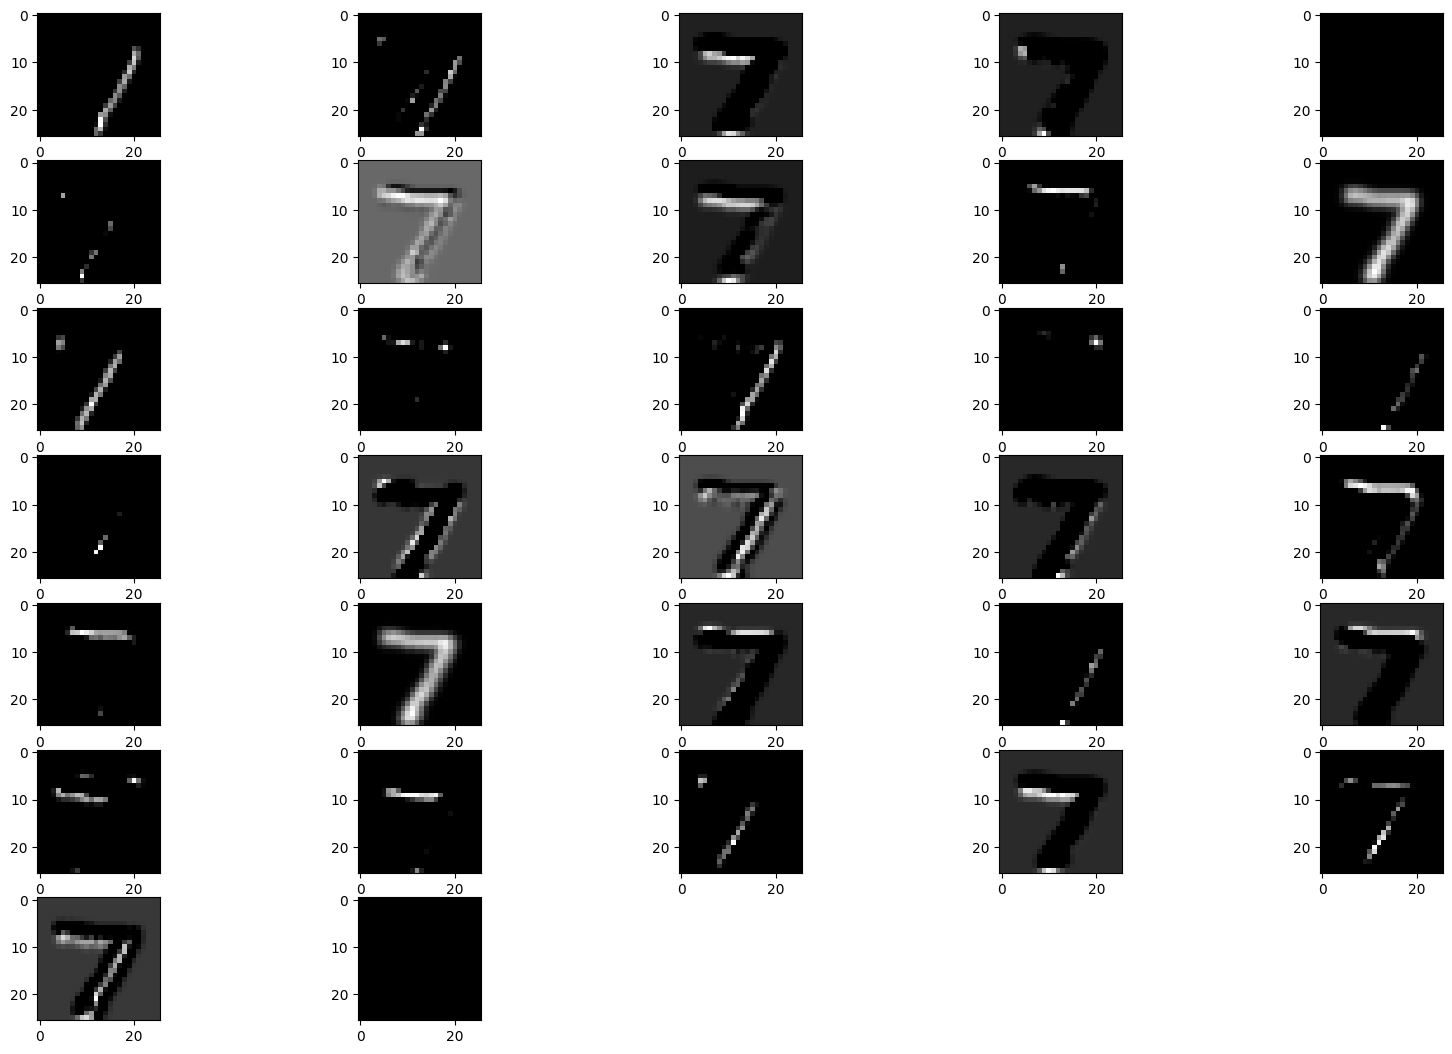

In [41]:
fig = pyplot.figure(figsize=(20,15))
for i in range(1,feature_maps.shape[3]+1):
# So, we can plot it in a 8x5 subplots
    pyplot.subplot(8,5,i)
    pyplot.imshow(feature_maps[0,:,:,i-1] , cmap='gray')
    
pyplot.show()